#### Intro slides: https://docs.google.com/presentation/d/12N0GYkmMtNn_qDIwK6gnu_VKtDQ-JVHg-PdQ-ukViXM/edit?usp=sharing


# <font color = 'blue'>This notebooks reviews:</font>

#### 1. Title selection by author
#### 2. Topics important to selected title
#### 3. Keywords important to selected topics
#### 4. Titles that most closely match selected title
#### 5. Metadata and subject list for title matches
<br>
<br>
    

## <font color = 'blue'>Imports</font>

In [1]:
#Gensim
import gensim
import gensim.corpora as corpora
#from gensim.utils import simple_preprocess
#from gensim.models import CoherenceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.metrics.pairwise import euclidean_distances
from wordcloud import WordCloud 

C:\Users\maggi\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## <font color = 'blue'>Load data frames and model</font>
LDA model using gensim generating 20 topics

In [2]:
#Load metadata
metadata = pd.read_csv('../data/model_data/dm_lda_04/metadata_lda04.csv')
#Load model
model = gensim.models.ldamodel.LdaModel.load('../data/model_data/dm_lda_04/model.lda04')
#Load topics per book
topics_summary = pd.read_csv('../data/model_data/dm_lda_04/topics_summary.csv')

In [3]:
#Top 10 keywords per topic
contents = []
for t in range(model.num_topics):
    wordlist = list(model.show_topic(t, 10))
    for words in wordlist:
        contents.append({'topic':t, 'keyword': words[0], 'importance': words[1]})
keywords = pd.DataFrame(contents)


## <font color = 'blue'>A sample of topic importances by book</font>

In [4]:
topics_summary.head()
#metadata.head()

,pg_id,doc_index,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,PG10057,0,0.002099,0.000328,0.075983,0.111052,0.006879,0.005760,0.027011,0.001206,...,0.021455,0.025291,0.130951,0.050395,0.009008,0.290606,0.043932,0.069184,0.067990,0.005143
1,PG10067,1,0.001172,0.006686,0.045212,0.063337,0.022029,0.000235,0.029929,0.010021,...,0.036915,0.105833,0.140186,0.046200,0.001156,0.248974,0.015719,0.046573,0.084675,0.005638
2,PG10082,2,0.002074,0.002601,0.031155,0.074460,0.021008,0.001451,0.015176,0.000000,...,0.039292,0.055678,0.079571,0.036918,0.000277,0.264973,0.024837,0.053421,0.067036,0.004741
3,PG10110,3,0.000000,0.000666,0.063976,0.100419,0.016767,0.001560,0.021734,0.000379,...,0.023847,0.063837,0.095575,0.060068,0.003135,0.261102,0.057441,0.052551,0.050909,0.015607
4,PG10377,4,0.000597,0.001484,0.025551,0.046569,0.022708,0.007099,0.006495,0.001405,...,0.006505,0.032670,0.147046,0.030050,0.005407,0.291932,0.031601,0.190689,0.066801,0.002084


## <font color = 'blue'>Define functions</font>

In [110]:
def booklist_topics(booklist):
    topics_list = topics_summary[topics_summary['pg_id']==(booklist)].sum()
    return(topics_list)

In [6]:
# Calculate euclidean distances for one book and output to a data frame
def show_title_matches(X_index):
    X = np.array([topics_summary.iloc[X_index,2:]])
    #print(X)
    contents = []
    for doc_index in range(len(topics_summary)):
        #print(doc_index)
        Y = np.array([topics_summary.iloc[doc_index, 2:]])
        dist = euclidean_distances(X,Y)[0][0]
        contents.append([doc_index, dist])
    doc_dist = pd.DataFrame(contents, columns = ['doc_index', 'dist'])
    doc_dist.sort_values('dist').head()
    doc_list = doc_dist.sort_values('dist').head()['doc_index'].to_list()
    pg_id_list = topics_summary[topics_summary['doc_index'].isin(doc_list)]['pg_id'].to_list()
    return metadata[metadata['id'].isin(pg_id_list)][['id','title','author','downloads','subjects']]

In [7]:
# Expand multiple subjects per title into a long form list
def show_title_subjects(meta_list):
    contents = []
    for row in meta_list.iterrows():
        #print(row[1])
        pg_id = (row[1][0])
        title = (row[1][1])
        subj = (row[1][4])
        subj = subj.replace('{','')
        subj = subj.replace('}','')
        subj = subj.split("', ")
        for item in subj:
            contents.append({'pg_id':pg_id,'title':title,'subject':item.replace("'","")})
    return pd.DataFrame(contents)

In [57]:
def get_topics():
    return list(keywords['topic'].sort_values().unique())

## <font color = 'blue'>Topics modeled</font>

In [60]:
@interact
def show_topic_wordcloud(topic = get_topics()):
    plt.figure(figsize=(12,8))
    plt.imshow(WordCloud(background_color=None).fit_words(dict(model.show_topic(topic, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(topic))
    return plt.show()

interactive(children=(Dropdown(description='topic', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

## <font color = 'blue'>Titles by topic importance</font>

In [86]:
@interact
def show_books_for_topic(topic = get_topics()):
    col = 'topic_'+str(topic)
    df = topics_summary[topics_summary[col]>0][['pg_id','doc_index',col]].sort_values(col,ascending = False).head()
    global pg_list
    pg_list = list(df['pg_id'])
    return df
    

interactive(children=(Dropdown(description='topic', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [125]:
metadata[metadata['id'].isin(pg_list)][['id','title','author','downloads','subjects']]

,id,title,author,downloads,subjects
149,PG2358,The After House,"Rinehart, Mary Roberts",86,"{'Murder -- Fiction', 'Yachts -- Fiction', 'De..."
232,PG33065,The Indian Drum,"Balmer, Edwin",22,"{'Chicago (Ill.) -- Fiction', 'Mystery fiction..."
292,PG35823,The Secret of the Reef,"Bindloss, Harold",16,"{'Salvage -- Fiction', 'Alaska -- Fiction', 'S..."
549,PG55993,The Diamond Ship,"Pemberton, Max",13,"{'Jewel thieves -- Fiction', 'Adventure storie..."
657,PG64873,Ice Planet,"Selwyn, Carl",268,"{'Neptune (Planet) -- Fiction', 'Mystery ficti..."


## <font color = 'blue'>Titles by author</font>

In [116]:
@interact
def show_author_books(author = list(metadata['author'].sort_values().unique())):
    df = metadata[metadata['author']==author][['id','title','author','downloads','subjects']]
    global auth_list
    auth_list = list(df['id'])
    return df

interactive(children=(Dropdown(description='author', options=('Adams, O. S.', 'Adams, Samuel Hopkins', 'Ainswo…

## <font color = 'blue'>Topics important to selected title</font>

In [126]:
@interact
def show_list_topics(booklist = auth_list):
    df = pd.DataFrame(booklist_topics(booklist)[2:], columns = ['importance'])
    df = df.sort_values('importance', ascending = False).head(8)
    global book_sel
    book_sel = booklist
    return df

interactive(children=(Dropdown(description='booklist', options=('PG28595', 'PG39891', 'PG55993'), value='PG285…

## <font color = 'blue'>Keywords important to selected topics</font>

In [10]:
@interact
def show_topic_keywords(topic = list(keywords['topic'].sort_values().unique())):
    return keywords[keywords['topic']==topic]
# add word cloud and num_words selection

interactive(children=(Dropdown(description='topic', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

## <font color = 'blue'>Titles that most closely match selected title</font>

In [127]:
X_index = metadata.index[metadata['id']==book_sel].tolist()[0]
meta_list = show_title_matches(X_index)
meta_list[['id','title','author','downloads']]

,id,title,author,downloads
219,PG32117,Eleven Possible Cases,"Fawcett, Edgar",86
257,PG34611,Geoffrey Hampstead: A Novel,"Jarvis, Stinson",23
358,PG40821,"Fighting Byng: A Novel of Mystery, Intrigue an...","Stone, A.",20
549,PG55993,The Diamond Ship,"Pemberton, Max",13
635,PG61514,"Captain Sparkle, Pirate; Or, A Hard Man to Catch","Carter, Nicholas (House name)",30


## <font color = 'blue'>Expand the subjects per title</font>

In [128]:
subjects = show_title_subjects(meta_list)
subjects.style.set_properties(subset=['title'], **{'width': '500px'})

,pg_id,title,subject
0,PG32117,Eleven Possible Cases,Short stories
1,PG32117,Eleven Possible Cases,Fiction
2,PG32117,Eleven Possible Cases,Detective and mystery stories
3,PG34611,Geoffrey Hampstead: A Novel,Detective and mystery stories
4,PG34611,Geoffrey Hampstead: A Novel,Toronto (Ont.) -- Fiction
5,PG40821,"Fighting Byng: A Novel of Mystery, Intrigue and Adventure",Detective and mystery stories
6,PG40821,"Fighting Byng: A Novel of Mystery, Intrigue and Adventure",Fiction
7,PG55993,The Diamond Ship,Jewel thieves -- Fiction
8,PG55993,The Diamond Ship,Adventure stories
9,PG55993,The Diamond Ship,Mystery fiction


In [52]:
topics_summary[topics_summary['topic_7']>.01][['pg_id','doc_index','topic_7']].sort_values('topic_7',ascending = False)

,pg_id,doc_index,topic_7
270,PG35022,270,0.043936
155,PG2454,155,0.025555
475,PG5054,475,0.024952
242,PG33466,242,0.024703
454,PG47368,454,0.024630
635,PG61514,635,0.023913
640,PG62085,640,0.023161
382,PG41132,382,0.022515
478,PG5073,478,0.022321
486,PG5149,486,0.021870


In [ ]:
# Some more topic visualization
for t in range(model.num_topics):
    plt.figure()
    #plt.imshow(WordCloud().fit_words(model.show_topic(t, 200)))
    plt.imshow(WordCloud(background_color="black", prefer_horizontal = 1).fit_words(dict(model.show_topic(t, 50))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [31]:
model.get_topic_terms(0, topn=20)

[(2828, 0.11076207),
 (4148, 0.098153025),
 (3522, 0.07361885),
 (3538, 0.056315064),
 (6945, 0.049061053),
 (6602, 0.037216607),
 (7836, 0.035317667),
 (578, 0.03328636),
 (2592, 0.029514303),
 (2270, 0.025690861),
 (653, 0.021255221),
 (3528, 0.019889649),
 (2045, 0.01943372),
 (5954, 0.016984068),
 (2241, 0.016026124),
 (908, 0.01256019),
 (4138, 0.012291809),
 (5989, 0.011526088),
 (3529, 0.009798709),
 (884, 0.009622333)]

In [34]:
model.get_term_topics(884, minimum_probability = .0001)

[(0, 0.009580477)]

In [16]:
model.show_topics(num_words=50)

[(0,
  '0.111*"manager" + 0.098*"island" + 0.074*"hedge" + 0.056*"traveller" + 0.049*"conspiracy" + 0.037*"cliff" + 0.035*"tent" + 0.033*"stage" + 0.030*"ch_teau" + 0.026*"theatre" + 0.021*"bicycle" + 0.020*"stall" + 0.019*"idol" + 0.017*"contradiction" + 0.016*"masterpiece" + 0.013*"goose" + 0.012*"compose" + 0.012*"stepmother" + 0.010*"tracing" + 0.010*"visage" + 0.009*"shopman" + 0.009*"sock" + 0.009*"limitation" + 0.009*"predecessor" + 0.008*"plucky" + 0.008*"tiller" + 0.008*"discredit" + 0.007*"condemnation" + 0.007*"narrator" + 0.006*"considering" + 0.006*"audience" + 0.005*"failing" + 0.005*"necessary" + 0.005*"guileless" + 0.005*"deep" + 0.004*"quondam" + 0.004*"richness" + 0.004*"enlarge" + 0.004*"prodigy" + 0.004*"speak" + 0.003*"women" + 0.003*"designing" + 0.003*"advisable" + 0.003*"performance" + 0.003*"amenity" + 0.003*"deprecating" + 0.002*"finishing_touche" + 0.002*"bushel" + 0.002*"bookshelf" + 0.002*"alertness"'),
 (8,
  '0.107*"machine" + 0.058*"agent" + 0.037*"franc

In [30]:
model.show_topic(2, topn=20)

[('work', 0.026939858),
 ('fellow', 0.02650584),
 ('lot', 0.020576492),
 ('captain', 0.01899662),
 ('country', 0.018378364),
 ('people', 0.018180672),
 ('game', 0.017511971),
 ('bit', 0.015837248),
 ('city', 0.014247753),
 ('world', 0.012712098),
 ('company', 0.0124462405),
 ('town', 0.011849247),
 ('party', 0.011248954),
 ('dollar', 0.010929919),
 ('job', 0.010686318),
 ('luck', 0.009808063),
 ('chap', 0.009206914),
 ('club', 0.008768029),
 ('guess', 0.008693911),
 ('deck', 0.008483334)]

In [6]:
dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__ignoreds',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__numpys',
 '__recursive_saveloads',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__scipys',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adapt_by_suffix',
 '_apply',
 '_load_specials',
 '_save_specials',
 '_smart_save',
 'add_lifecycle_event',
 'alpha',
 'bound',
 'callbacks',
 'chunksize',
 'clear',
 'decay',
 'diff',
 'dispatcher',
 'distributed',
 'do_estep',
 'do_mstep',
 'dtype',
 'eta',
 'eval_every',
 'expElogbeta',
 'gamma_threshold',
 'get_document_topics',
 'get_term_topics',
 'get_topic_terms',
 'get_topics',
 'id2word',
 'inference',
 'init_dir_prior',
 'iterations',
 'lifecycle_events',
 'load',
 'log_perplexity',
 'minimum_phi_value',
 'minimum_probability',


https://www.youtube.com/watch?v=oP3c1h8v2ZQ

In [ ]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

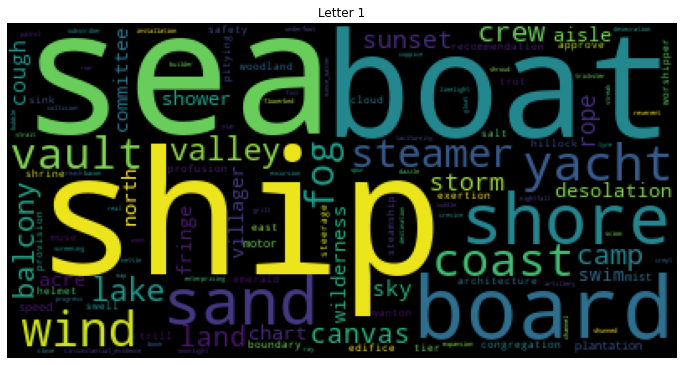

In [44]:
topic = 1
plt.figure(figsize=(12,8))
plt.imshow(WordCloud(background_color=None).fit_words(dict(model.show_topic(topic, 200))))
plt.axis("off")
plt.title("Letter " + str(topic))
#plt.savefig('../data/model_data/dm_lda_04/topic1_ship.png', bbox_inches='tight')
